# Australian forecast skill

This notebook contains plots showing the skill of quantities averaged over the Natural Resource Management (NRM) super-cluster regions (see https://www.climatechangeinaustralia.gov.au/en/overview/methodology/nrm-regions/). As for the generic skill results, plots are shown for CAFE-f6 and for the CanESM5 and EC-Earth3 CMIP6 DCPP submissions (where possible). 30-year climatological and verification periods are used for both the CAFE-f6 and CMIP6 data. However, because the historical CMIP6 data end in 2014, these periods differ slightly: 1991-2020 for CAFE-f6; 1985-2014 for CanESM5 and EC-Earth3. Note also that the CanESM5 hindcasts are initialised at the end of December every year, while the CAFE-f6 and EC-Earth3 hindcasts are initialised at the beginning of November every year.

Significant points (as identified by a non-parametric block bootstrapping procedure) are shown by filled circles for the line plots.

If you wish to see anything added to these results, please contact Dougie.

In [1]:
import warnings

warnings.filterwarnings("ignore")

import geopandas

import matplotlib.pyplot as plt

from notebook_helper import plot_metrics, plot_hindcasts

In [2]:
%load_ext autoreload
%autoreload 2
%load_ext lab_black

## Focus regions
In the following we'll show some skill results for the following NRM super clusters and for the average over all of Australia

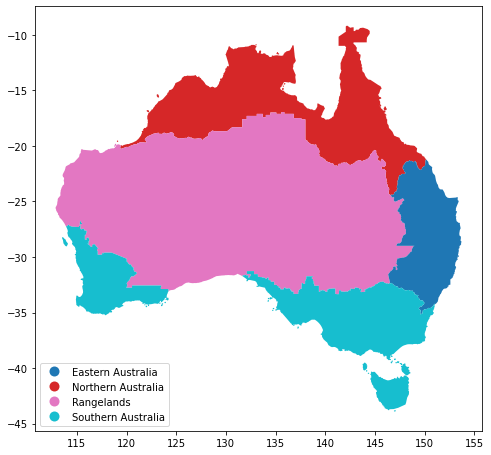

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
df = geopandas.read_file("../data/raw/NRM_super_clusters/NRM_super_clusters.shp")
_ = df.plot("label", ax=ax, legend=True, legend_kwds={"loc": "lower left"})

## Near-surface (2m) temperature relative to AGCD

### Hindcast timeseries

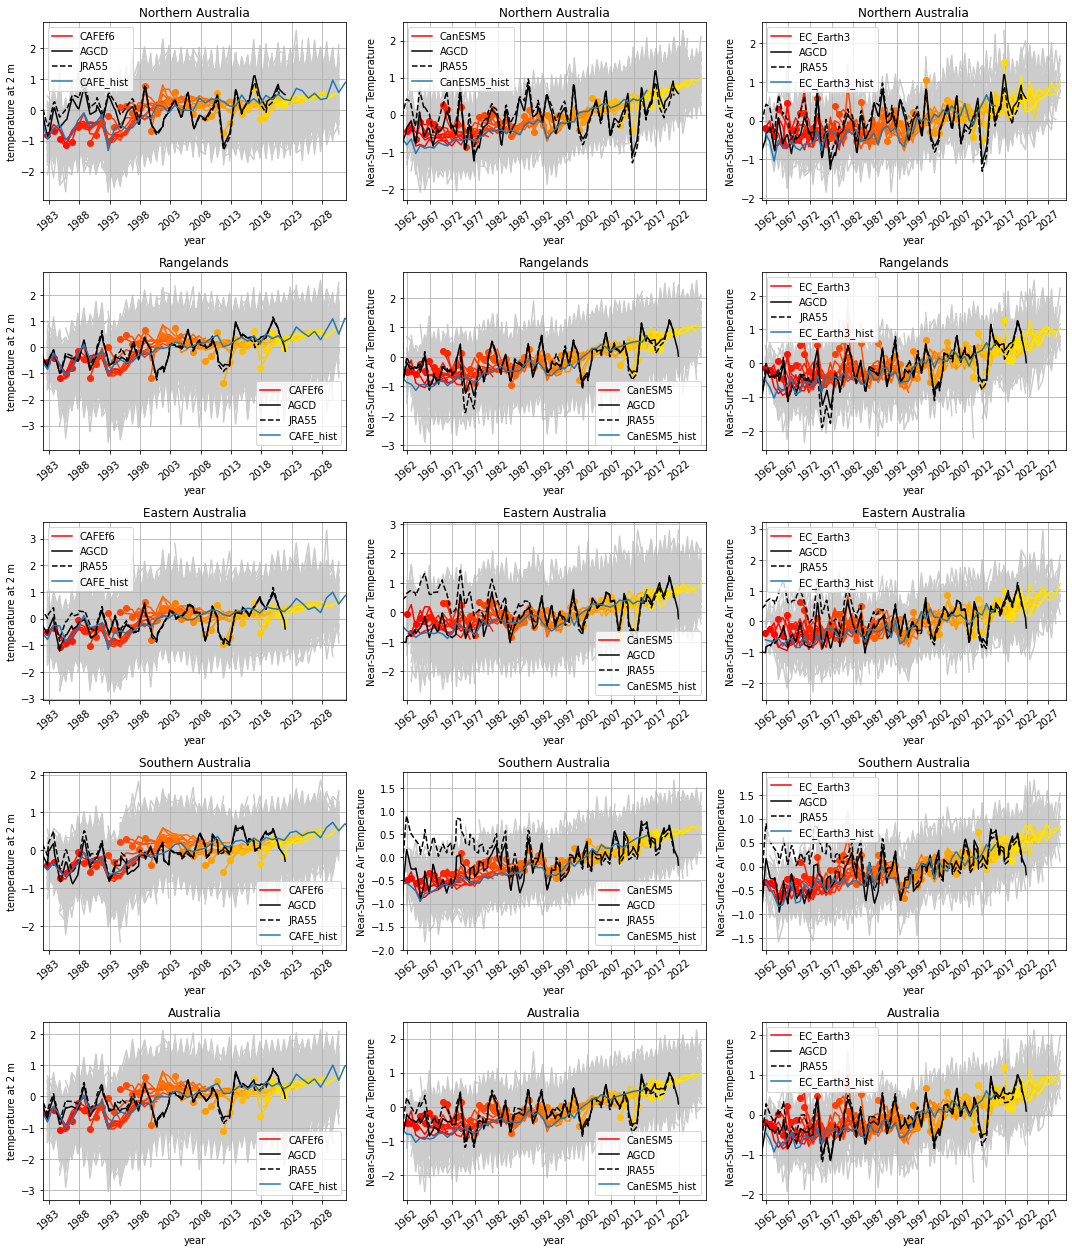

In [4]:
plot_hindcasts(
    ["CAFEf6", "CanESM5", "EC_Earth3"],
    ["CAFE_hist", "CanESM5_hist", "EC_Earth3_hist"],
    ["AGCD", "JRA55"],
    "annual",
    "t_ref",
    "Aus_NRM",
)

### Anomaly correlation coefficient (Pearson)

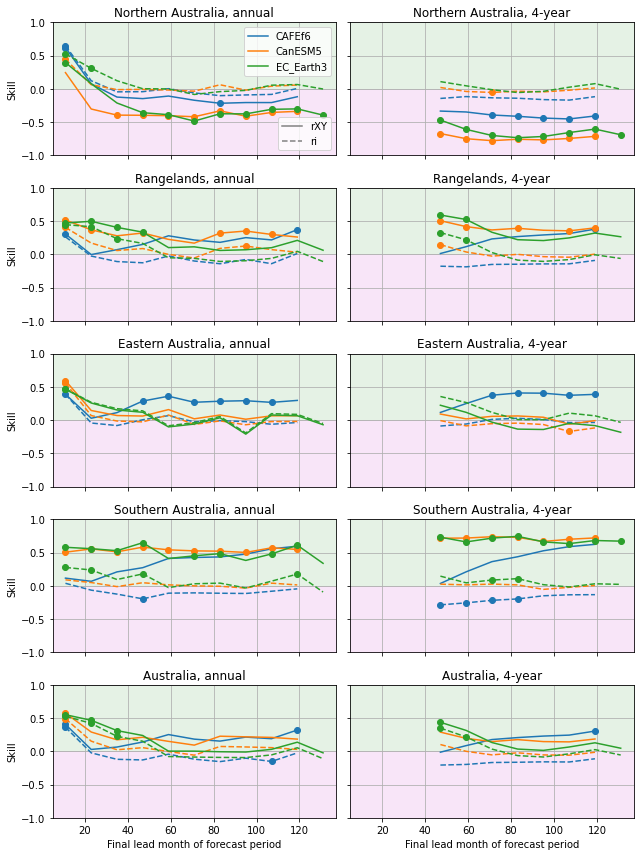

In [5]:
_ = plot_metrics(
    ["CAFEf6", "CanESM5", "EC_Earth3"],
    "JRA55",
    ["annual", "4-year"],
    "t_ref",
    ["rXY", "ri"],
    "Aus_NRM",
)

### Mean squared skill score

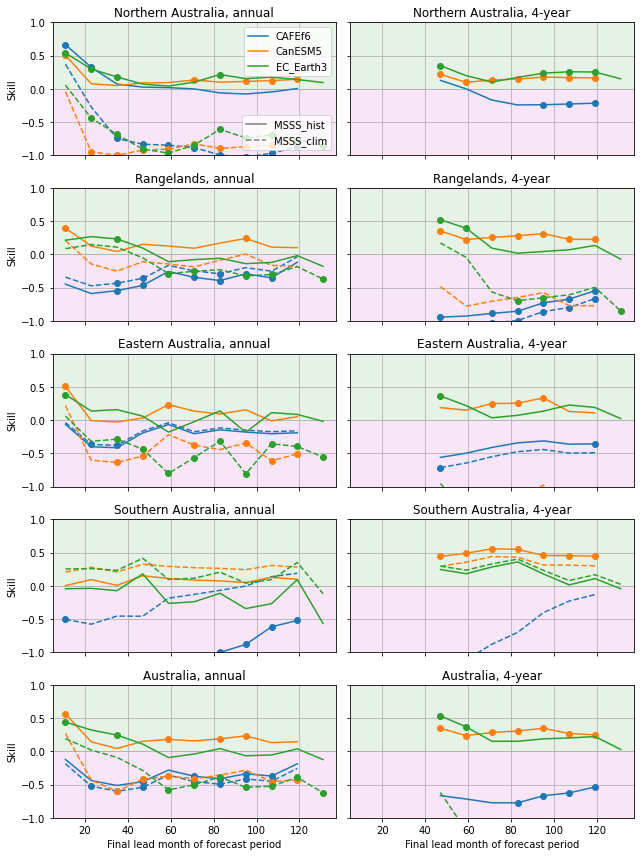

In [6]:
_ = plot_metrics(
    ["CAFEf6", "CanESM5", "EC_Earth3"],
    "JRA55",
    ["annual", "4-year"],
    "t_ref",
    ["MSSS_hist", "MSSS_clim"],
    "Aus_NRM",
)

### Rank probability skill score relative to historical simulations

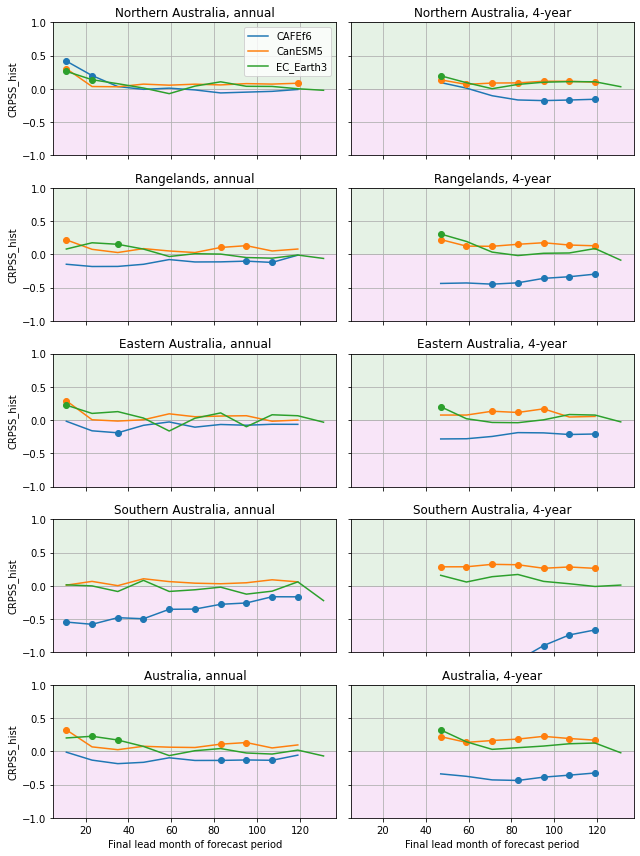

In [7]:
_ = plot_metrics(
    ["CAFEf6", "CanESM5", "EC_Earth3"],
    "JRA55",
    ["annual", "4-year"],
    "t_ref",
    ["CRPSS_hist"],
    "Aus_NRM",
)

## Precipitation relative to AGCD

### Hindcast timeseries

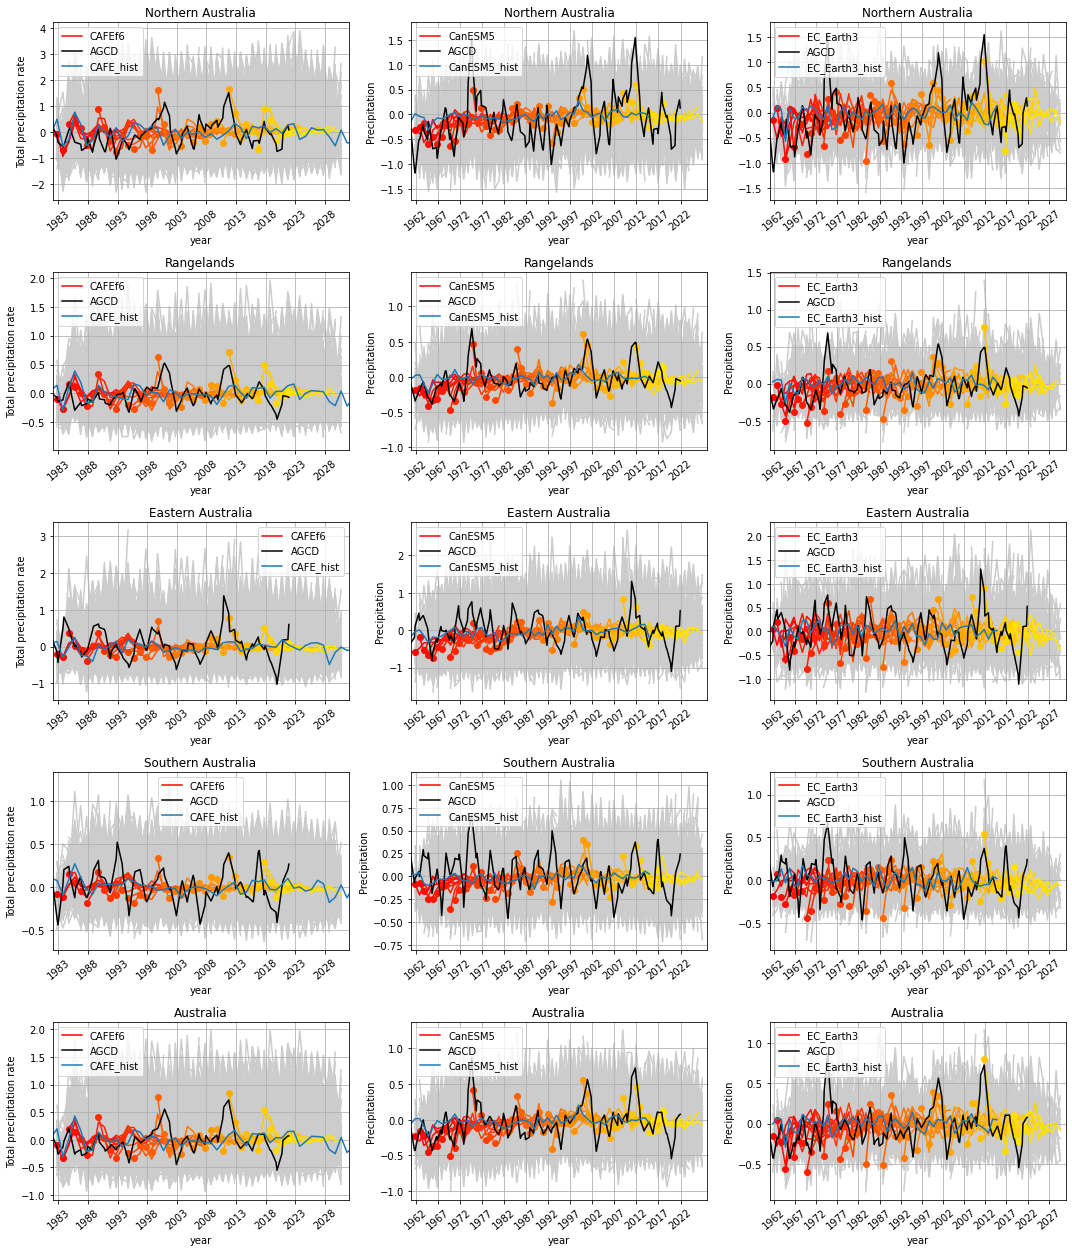

In [8]:
plot_hindcasts(
    ["CAFEf6", "CanESM5", "EC_Earth3"],
    ["CAFE_hist", "CanESM5_hist", "EC_Earth3_hist"],
    ["AGCD"],
    "annual",
    "precip",
    "Aus_NRM",
)

### Anomaly correlation coefficient (Pearson)

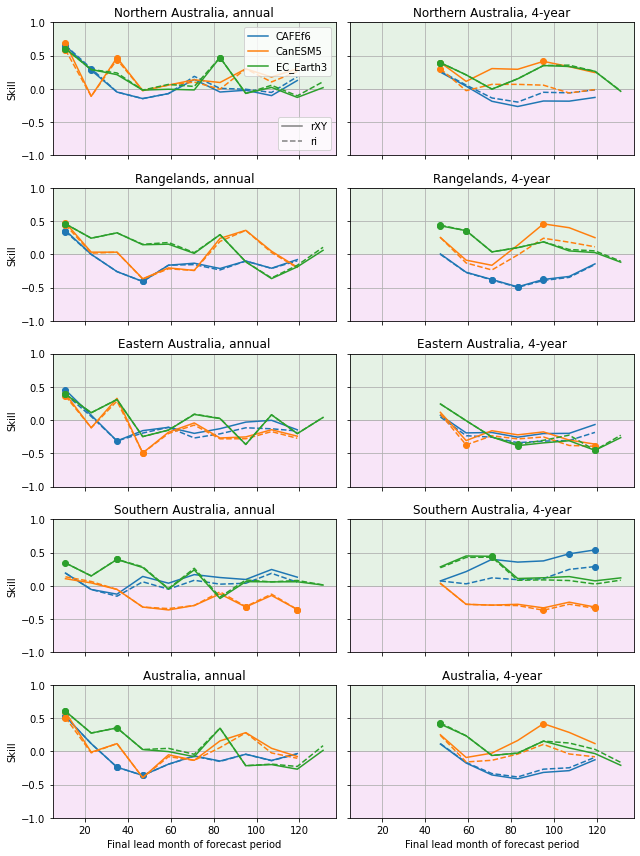

In [9]:
_ = plot_metrics(
    ["CAFEf6", "CanESM5", "EC_Earth3"],
    "AGCD",
    ["annual", "4-year"],
    "precip",
    ["rXY", "ri"],
    "Aus_NRM",
)

### Mean squared skill score

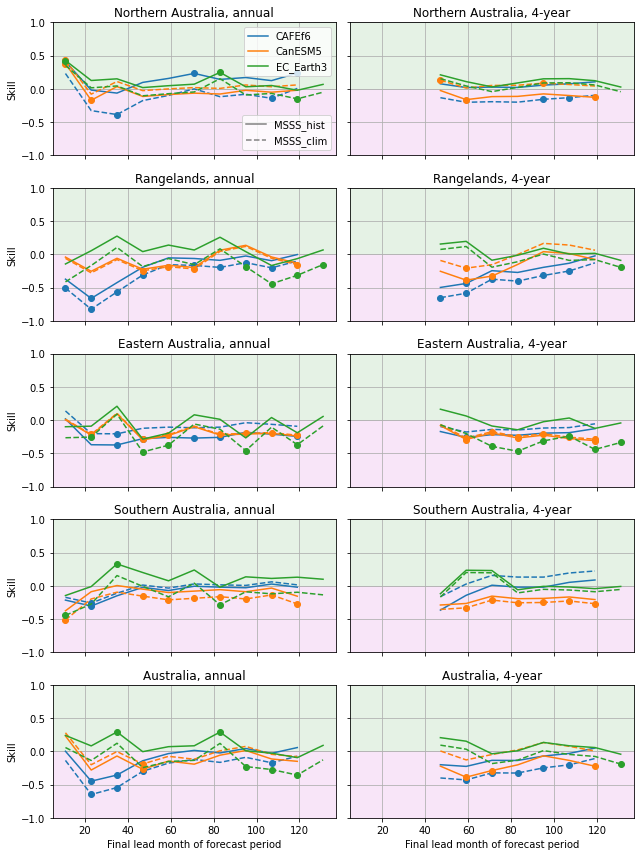

In [10]:
_ = plot_metrics(
    ["CAFEf6", "CanESM5", "EC_Earth3"],
    "AGCD",
    ["annual", "4-year"],
    "precip",
    ["MSSS_hist", "MSSS_clim"],
    "Aus_NRM",
)

### Rank probability skill score relative to historical simulations

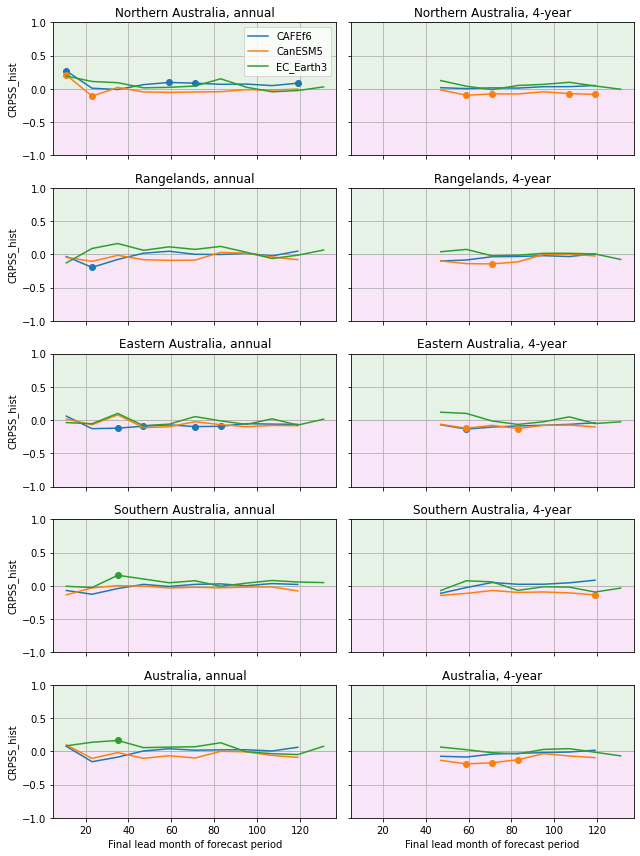

In [11]:
_ = plot_metrics(
    ["CAFEf6", "CanESM5", "EC_Earth3"],
    "AGCD",
    ["annual", "4-year"],
    "precip",
    ["CRPSS_hist"],
    "Aus_NRM",
)

## Near-surface (10m) wind relative to JRA55

### Hindcast timeseries

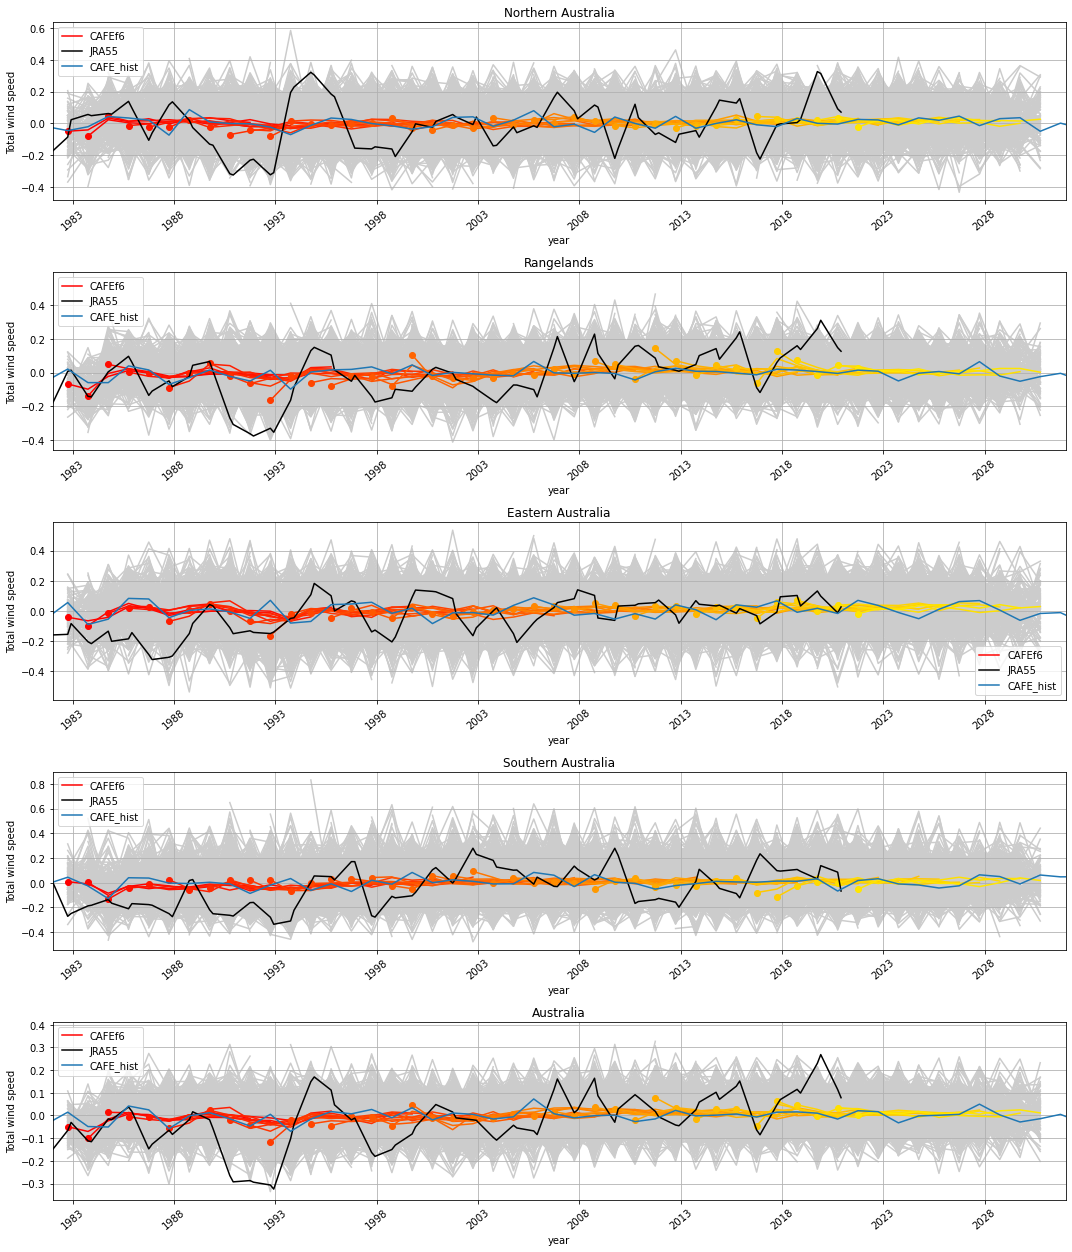

In [12]:
plot_hindcasts(["CAFEf6"], ["CAFE_hist"], ["JRA55"], "annual", "V_tot", "Aus_NRM")

### Anomaly correlation coefficient (Pearson)

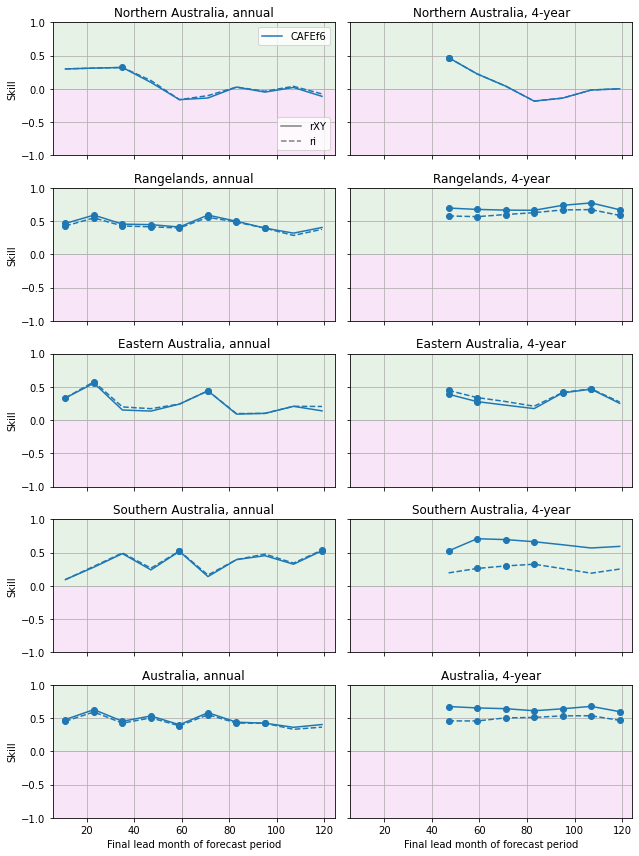

In [13]:
_ = plot_metrics(
    ["CAFEf6"], "JRA55", ["annual", "4-year"], "V_tot", ["rXY", "ri"], "Aus_NRM"
)

### Mean squared skill score

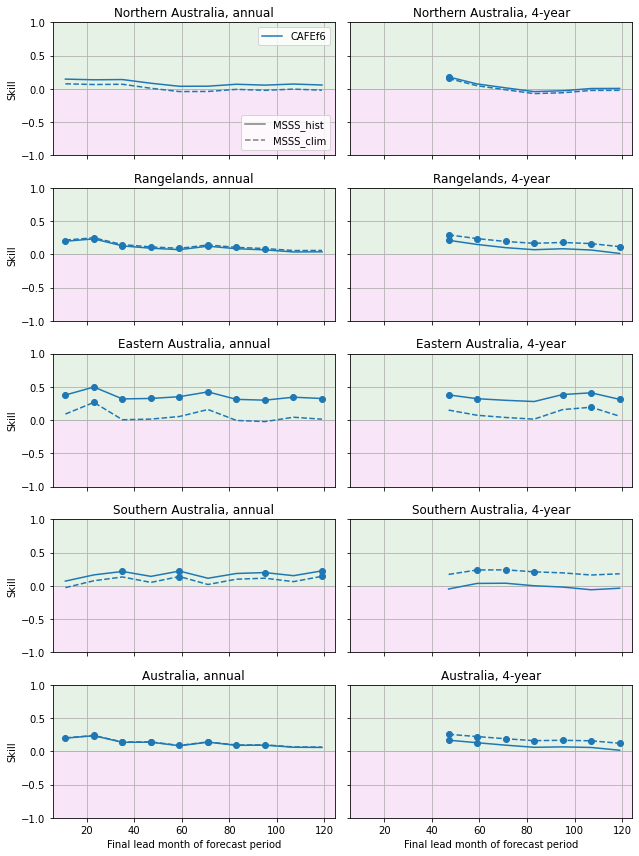

In [14]:
_ = plot_metrics(
    ["CAFEf6"],
    "JRA55",
    ["annual", "4-year"],
    "V_tot",
    ["MSSS_hist", "MSSS_clim"],
    "Aus_NRM",
)

### Rank probability skill score relative to historical simulations

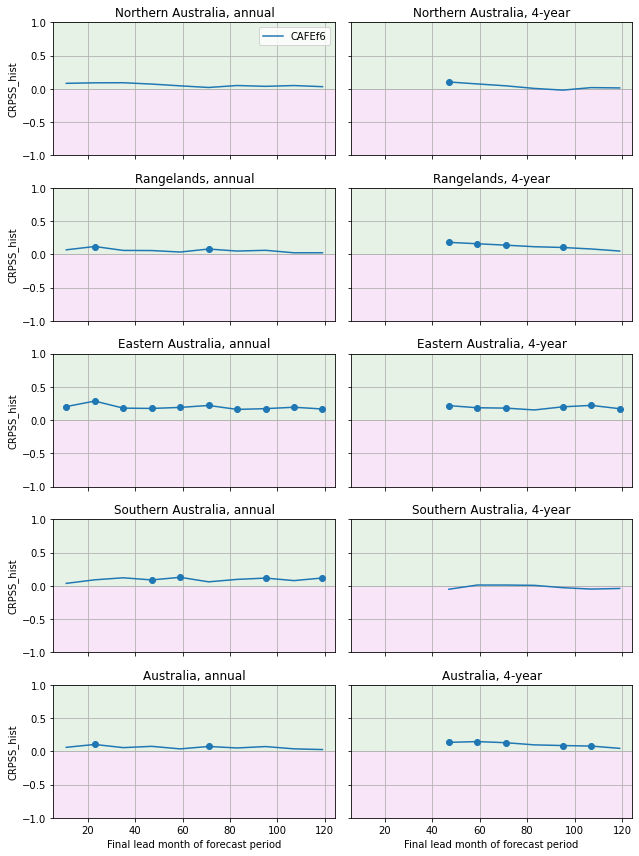

In [15]:
_ = plot_metrics(
    ["CAFEf6"], "JRA55", ["annual", "4-year"], "V_tot", ["CRPSS_hist"], "Aus_NRM"
)

## Extreme 2m temperature relative to AGCD

Here we assess the proportion of days in forecast period with maximum temperature over 90th percentile percentile. Percentile thresholds for each day-of-year are determined for each dataset from its own climatology over the period 1991-2020. In the case of hindcast data, percentile thresholds are determined for each lead time independently. All instances of Feb 29th are removed for all datasets to simplify processing.  

### Hindcast timeseries

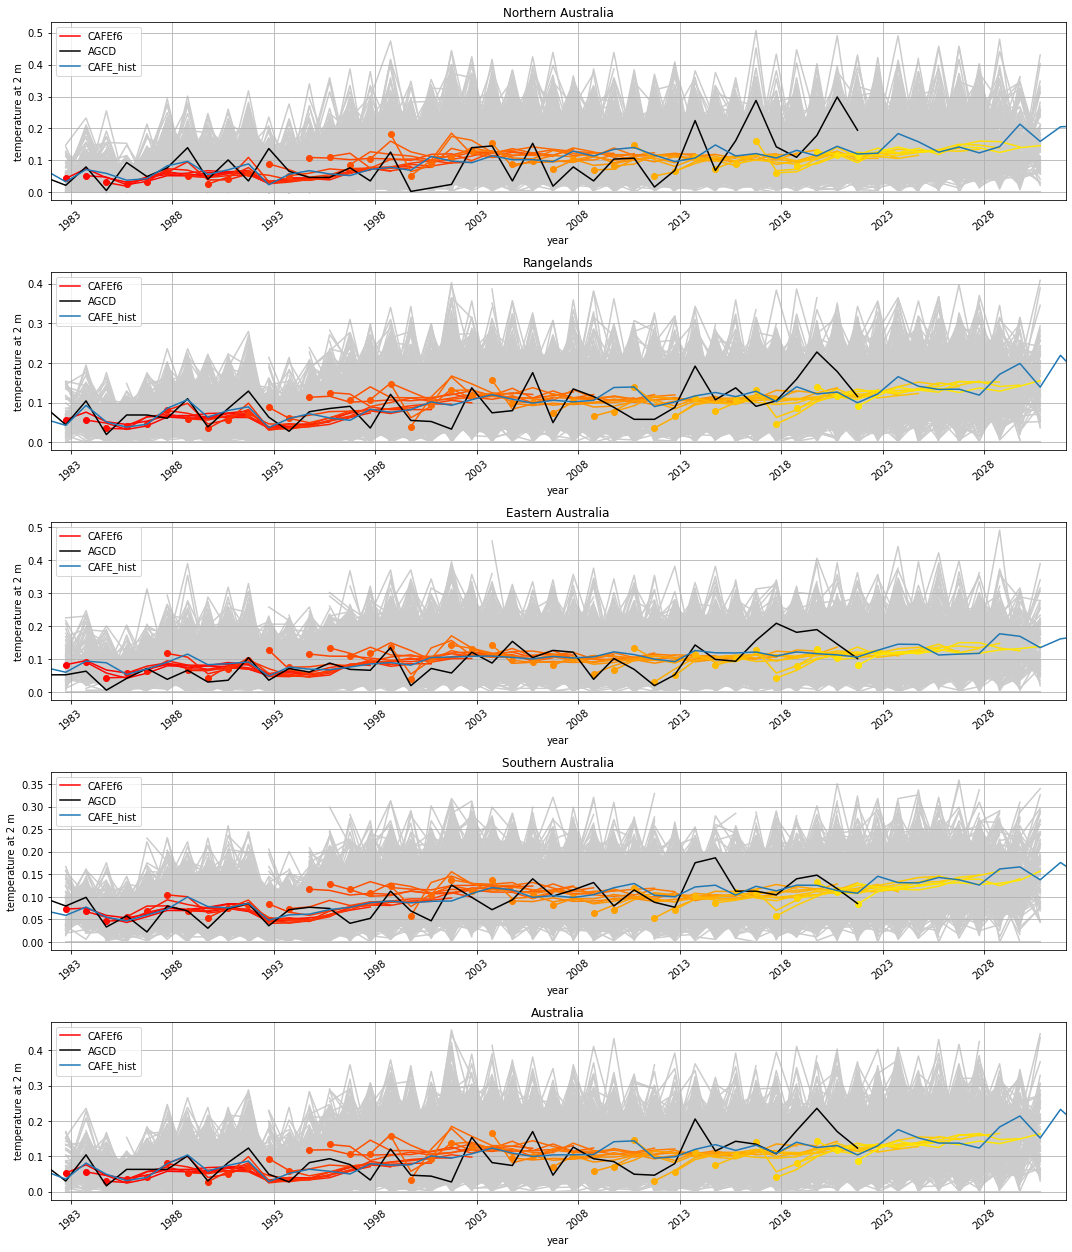

In [16]:
plot_hindcasts(
    ["CAFEf6"],
    ["CAFE_hist"],
    ["AGCD"],
    "annual",
    "t_ref_max",
    "Aus_NRM",
    "days_over_p90",
)

### Anomaly correlation coefficient (Spearman)

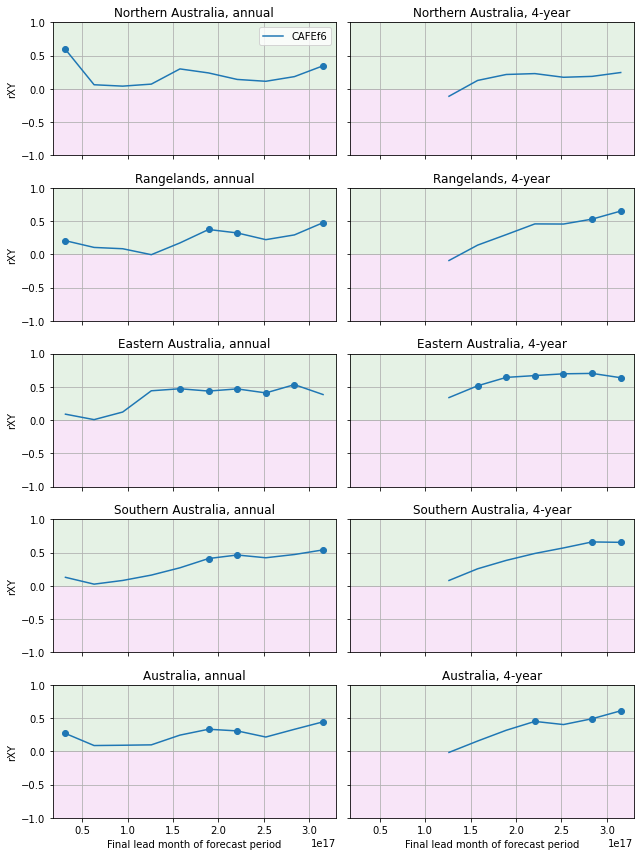

In [17]:
_ = plot_metrics(
    ["CAFEf6"],
    "AGCD",
    ["annual", "4-year"],
    "t_ref_max",
    ["rXY"],
    "Aus_NRM",
    "days_over_p90",
)

### Mean squared skill score

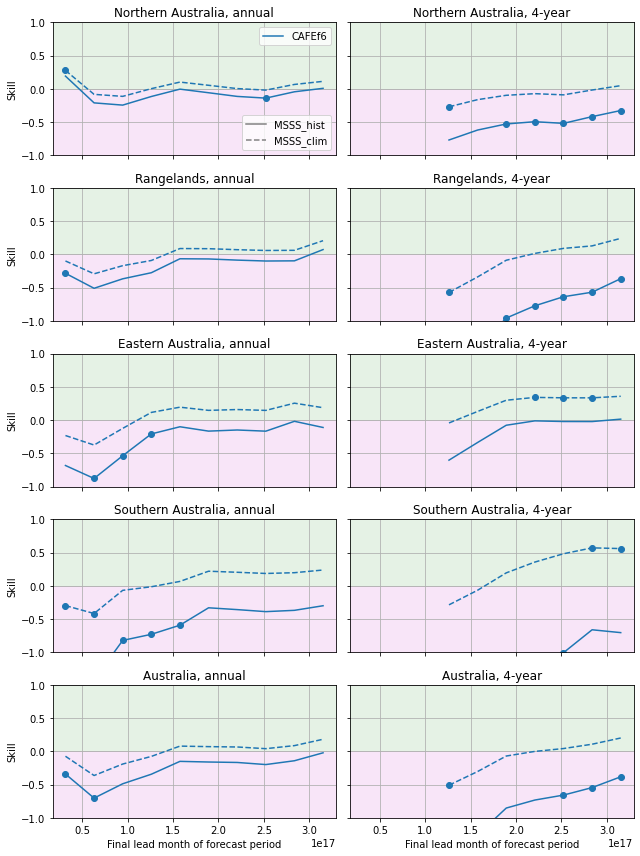

In [18]:
_ = plot_metrics(
    ["CAFEf6"],
    "AGCD",
    ["annual", "4-year"],
    "t_ref_max",
    ["MSSS_hist", "MSSS_clim"],
    "Aus_NRM",
    "days_over_p90",
)

### Rank probability skill score relative to historical simulations

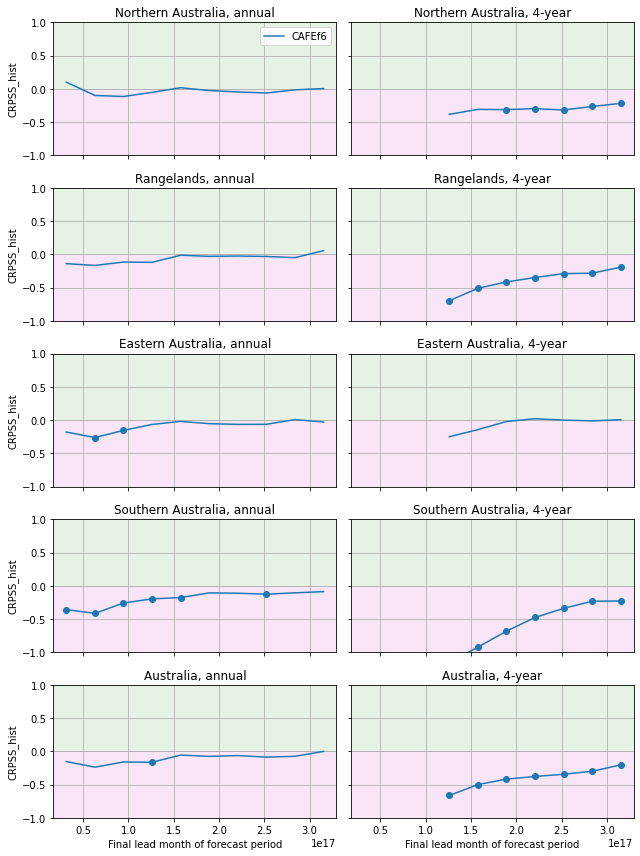

In [19]:
_ = plot_metrics(
    ["CAFEf6"],
    "AGCD",
    ["annual", "4-year"],
    "t_ref_max",
    ["CRPSS_hist"],
    "Aus_NRM",
    "days_over_p90",
)

## Extreme precipitation relative to AGCD

Here we assess the proportion of days in forecast period with precipitation over 90th percentile percentile. Percentile thresholds for each day-of-year are determined for each dataset from its own climatology over the period 1991-2020. In the case of hindcast data, percentile thresholds are determined for each lead time independently. All instances of Feb 29th are removed for all datasets to simplify processing.  

### Hindcast timeseries

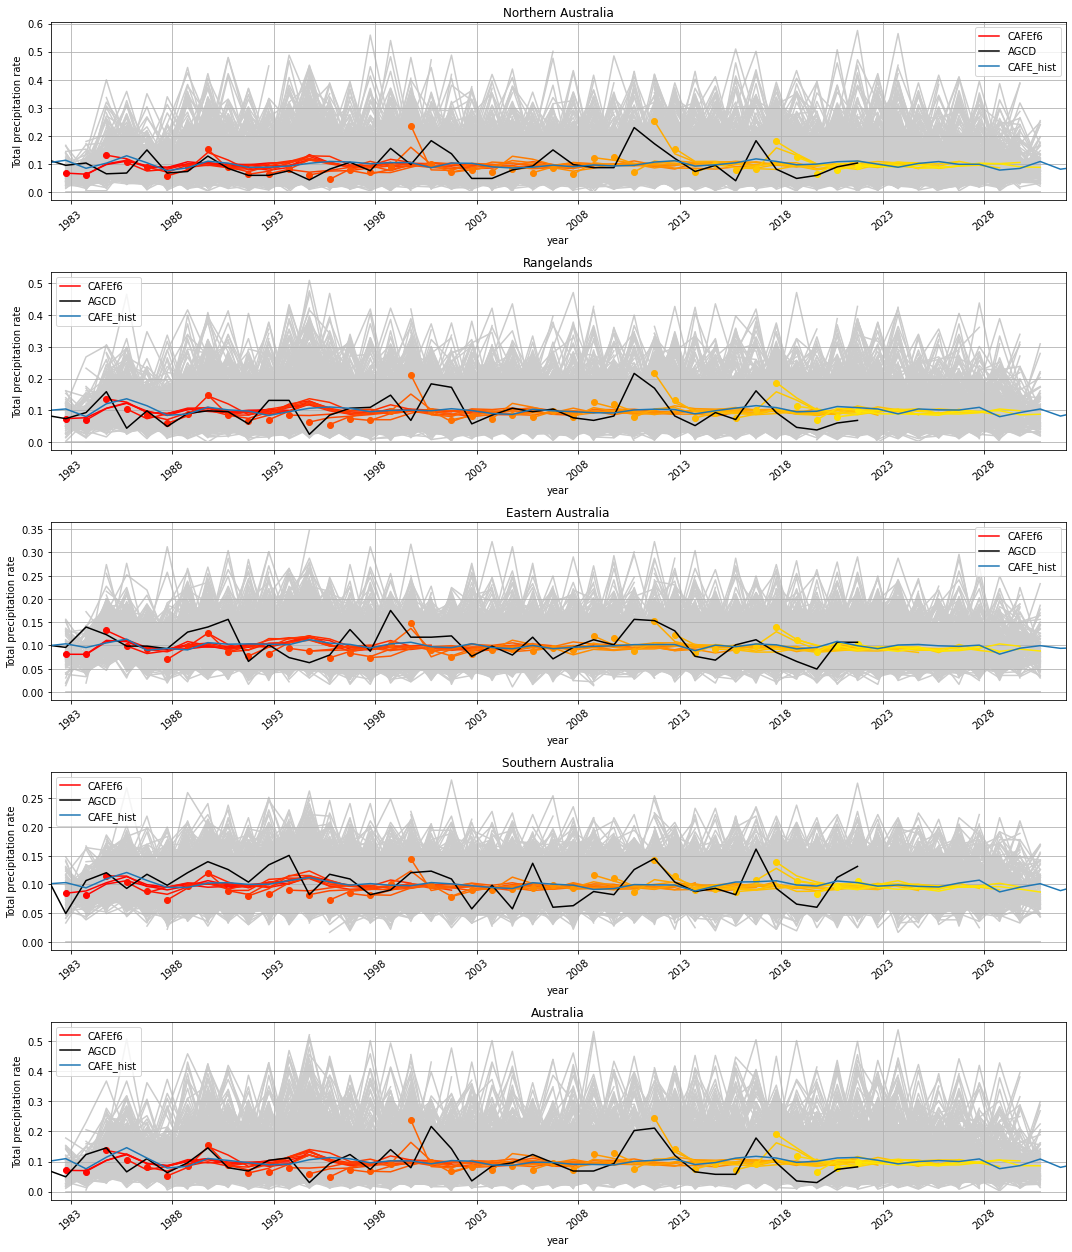

In [20]:
plot_hindcasts(
    ["CAFEf6"],
    ["CAFE_hist"],
    ["AGCD"],
    "annual",
    "precip",
    "Aus_NRM",
    "days_over_p90",
)

### Anomaly correlation coefficient (Spearman)

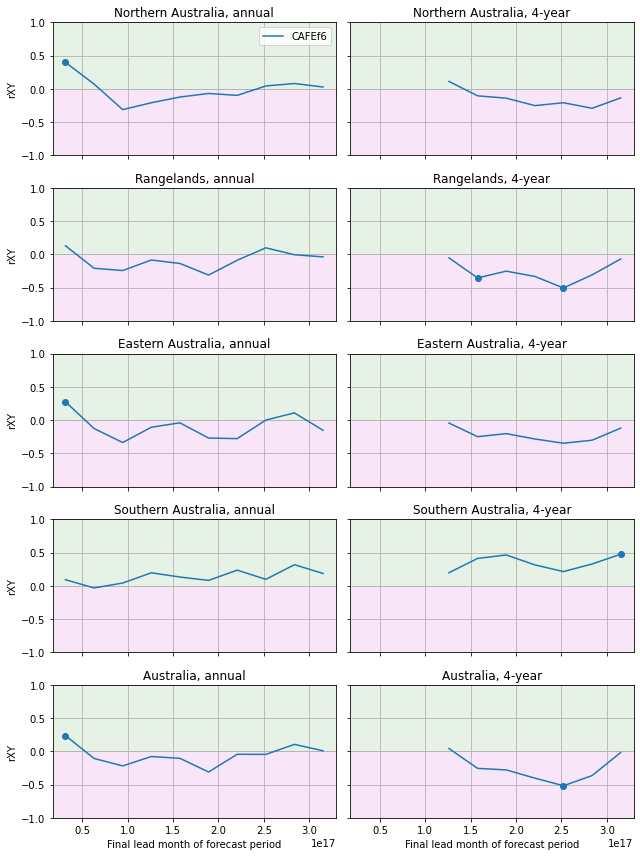

In [21]:
_ = plot_metrics(
    ["CAFEf6"],
    "AGCD",
    ["annual", "4-year"],
    "precip",
    ["rXY"],
    "Aus_NRM",
    "days_over_p90",
)

### Mean squared skill score

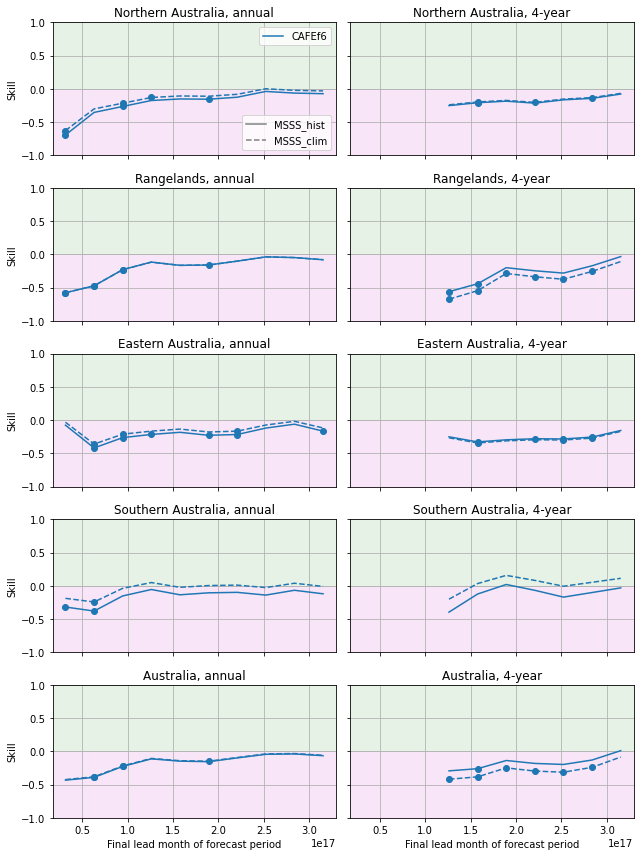

In [22]:
_ = plot_metrics(
    ["CAFEf6"],
    "AGCD",
    ["annual", "4-year"],
    "precip",
    ["MSSS_hist", "MSSS_clim"],
    "Aus_NRM",
    "days_over_p90",
)

### Rank probability skill score relative to historical simulations

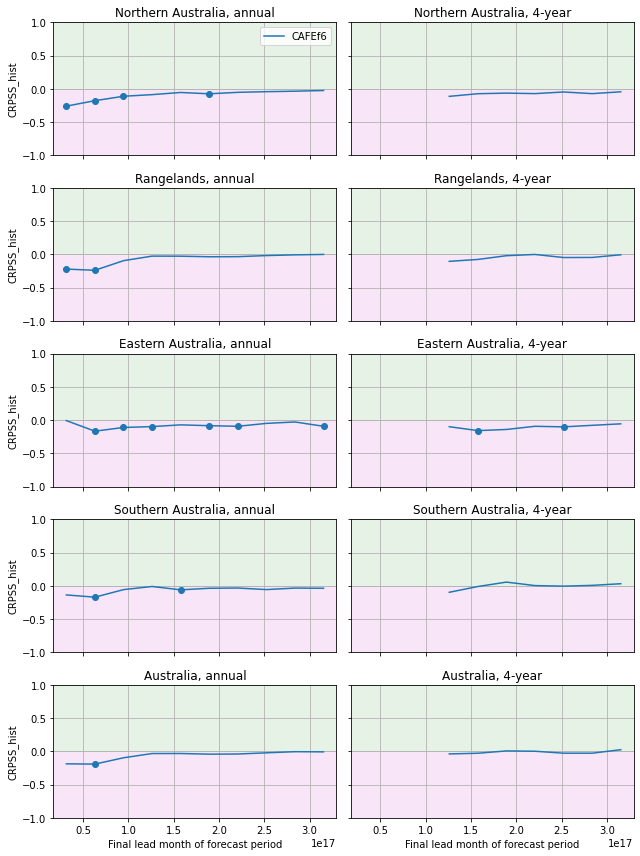

In [23]:
_ = plot_metrics(
    ["CAFEf6"],
    "AGCD",
    ["annual", "4-year"],
    "precip",
    ["CRPSS_hist"],
    "Aus_NRM",
    "days_over_p90",
)

## Extreme Forest Fire Danger Index relative to JRA55

Here we assess the proportion of days in forecast period with FFDI over 90th percentile percentile. Percentile thresholds for each day-of-year are determined for each dataset from its own climatology over the period 1991-2020. In the case of hindcast data, percentile thresholds are determined for each lead time independently. All instances of Feb 29th are removed for all datasets to simplify processing.  

Note that FFDI is calculated in a non-standard way here due to data availability (see Richardson et al. 2021 and Squire et al. 2021):

 - The drought factor is estimated as the 20-day accumulated rainfall scaled to lie between 0 and 10, with larger values indicating less precipitation
 - We use daily mean relative humidity at 1000 hPa rather than daily max relative humidity at 2m
 - We use daily mean wind speed at 10m rather than daily max wind speed

### Hindcast timeseries

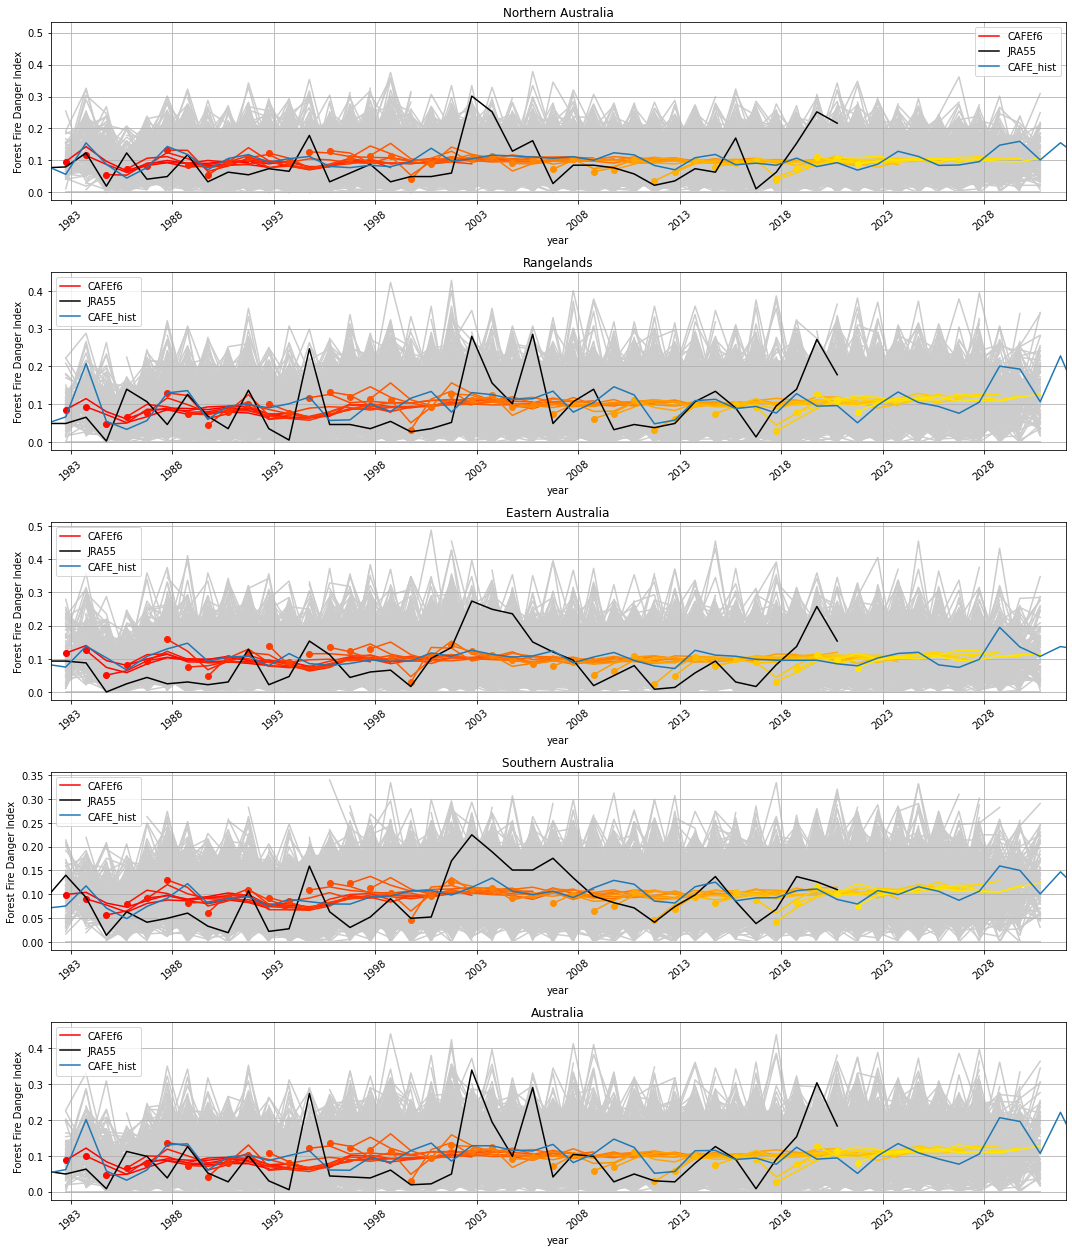

In [24]:
plot_hindcasts(
    ["CAFEf6"],
    ["CAFE_hist"],
    ["JRA55"],
    "annual",
    "ffdi",
    "Aus_NRM",
    "days_over_p90",
)

### Anomaly correlation coefficient (Spearman)

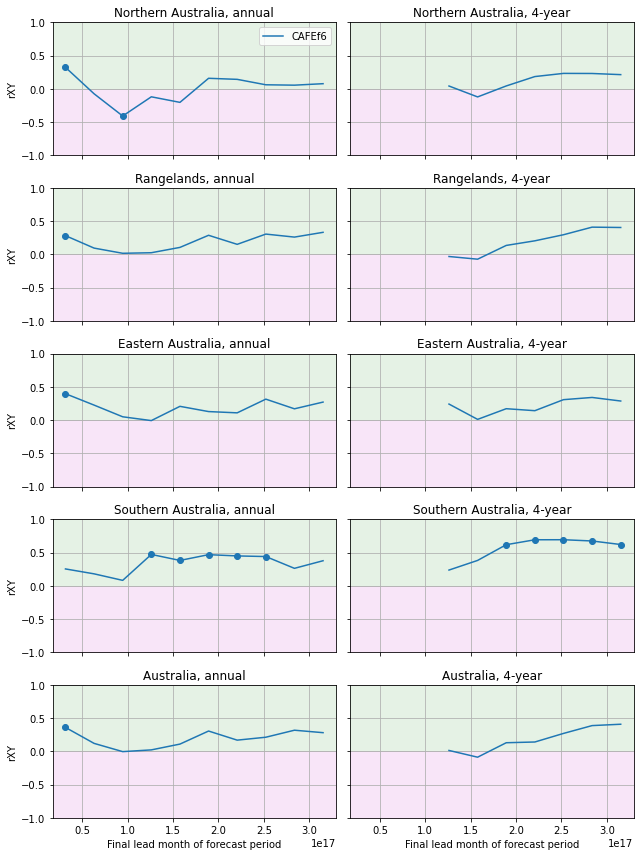

In [25]:
_ = plot_metrics(
    ["CAFEf6"],
    "JRA55",
    ["annual", "4-year"],
    "ffdi",
    ["rXY"],
    "Aus_NRM",
    "days_over_p90",
)

### Mean squared skill score

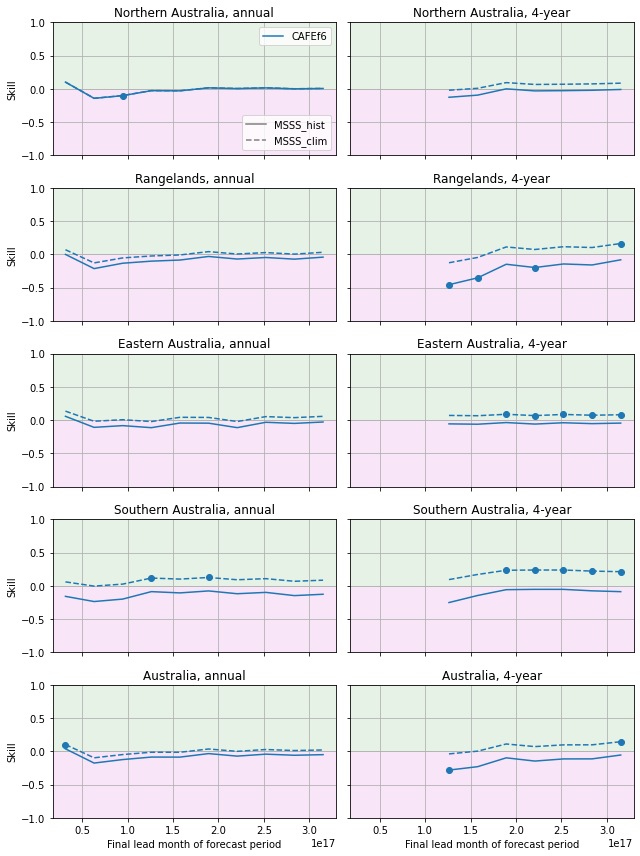

In [26]:
_ = plot_metrics(
    ["CAFEf6"],
    "JRA55",
    ["annual", "4-year"],
    "ffdi",
    ["MSSS_hist", "MSSS_clim"],
    "Aus_NRM",
    "days_over_p90",
)

### Rank probability skill score relative to historical simulations

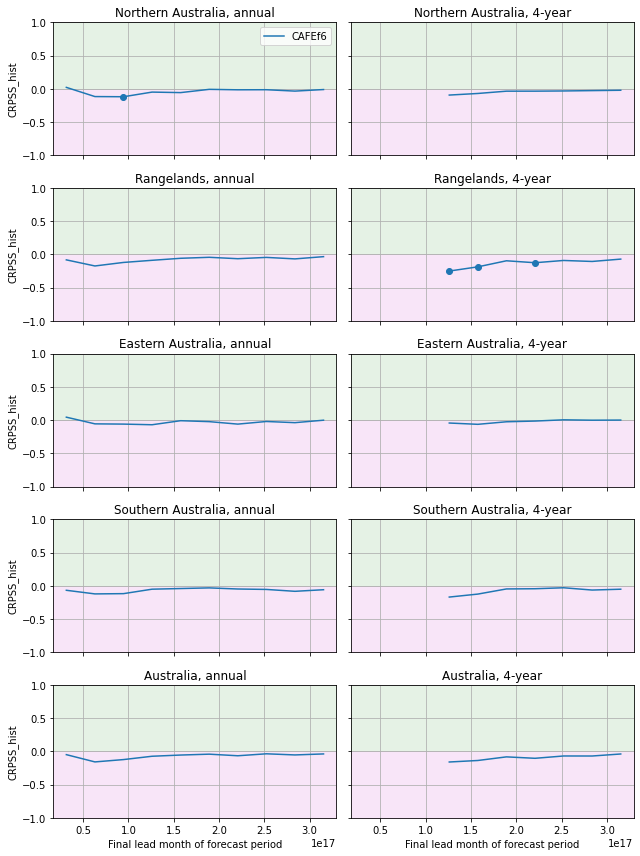

In [27]:
_ = plot_metrics(
    ["CAFEf6"],
    "JRA55",
    ["annual", "4-year"],
    "ffdi",
    ["CRPSS_hist"],
    "Aus_NRM",
    "days_over_p90",
)

## Drought relative to AGCD

Here a drought event is defined as when rainfall over a 3-month period is in the lowest decile (this is the Bureau of Meteorology definition, see https://link.springer.com/article/10.1007/s00382-020-05235-0). We assess the proportion of rolling 3-month periods in forecast period with precip within the first decile (equivalent to assessing the number of droughts in the forecast period). Percentile thresholds for each 3-month period are determined for each dataset from its own climatology over the period 1991-2020. In the case of hindcast data, percentile thresholds are determined for each lead time independently.

Note that with the definition of drought used here, data are only available for lead months 2 onwards (using the last month of the 3-month average to assign the lead). Thus, while the annual averages for the prior plots span the lead periods 0-11 months, 12-23 months etc, the annual averages in the following span 2-13 months, 14-25 months etc, where the 2-13 month average, for example, actually uses data from lead month 0-13.

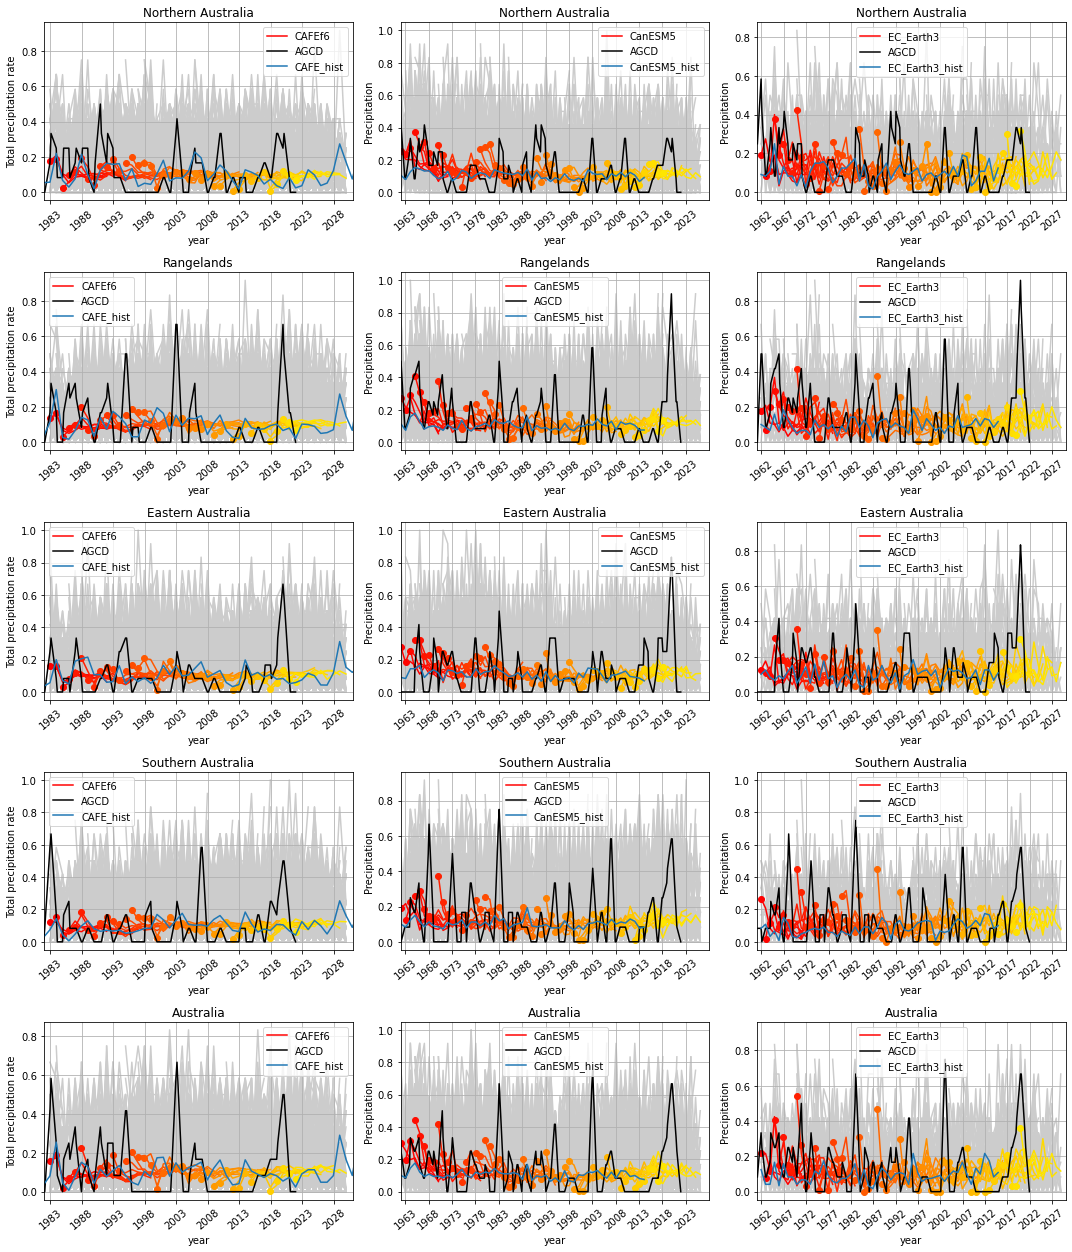

In [28]:
plot_hindcasts(
    ["CAFEf6", "CanESM5", "EC_Earth3"],
    ["CAFE_hist", "CanESM5_hist", "EC_Earth3_hist"],
    ["AGCD"],
    "annual",
    "precip",
    "Aus_NRM",
    "3-months_under_p10",
)

### Anomaly correlation coefficient (Spearman)

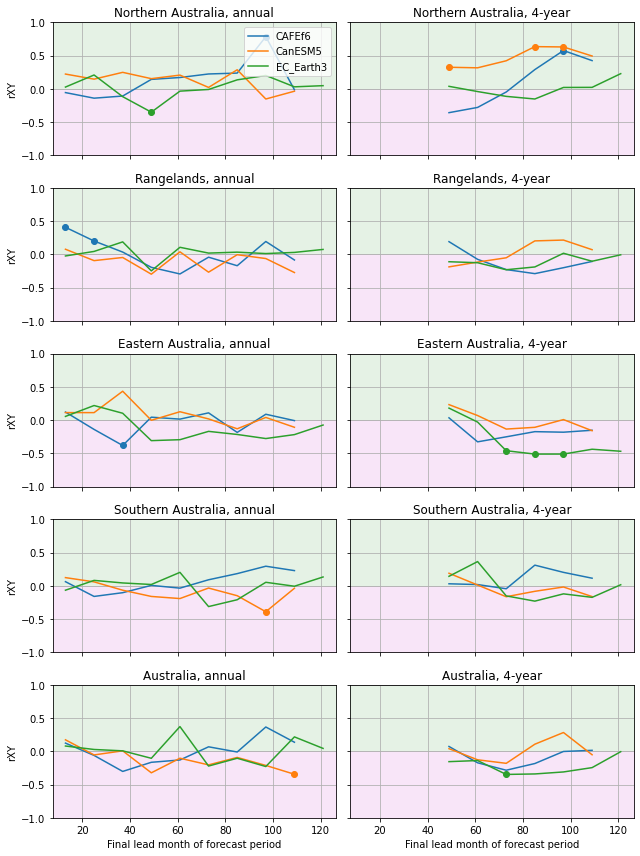

In [29]:
_ = plot_metrics(
    ["CAFEf6", "CanESM5", "EC_Earth3"],
    "AGCD",
    ["annual", "4-year"],
    "precip",
    ["rXY"],
    "Aus_NRM",
    "3-months_under_p10",
)

### Mean squared skill score

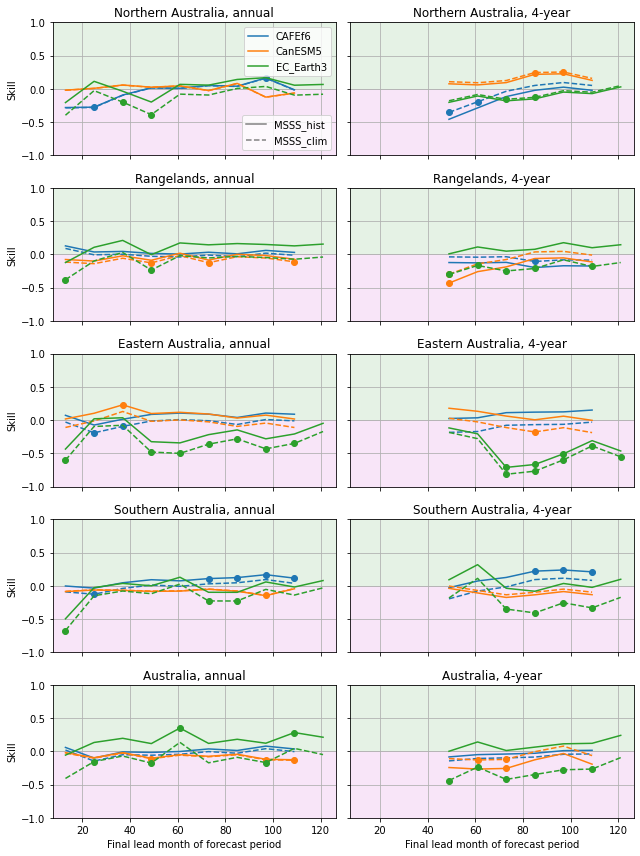

In [30]:
_ = plot_metrics(
    ["CAFEf6", "CanESM5", "EC_Earth3"],
    "AGCD",
    ["annual", "4-year"],
    "precip",
    ["MSSS_hist", "MSSS_clim"],
    "Aus_NRM",
    "3-months_under_p10",
)

### Rank probability skill score relative to historical simulations

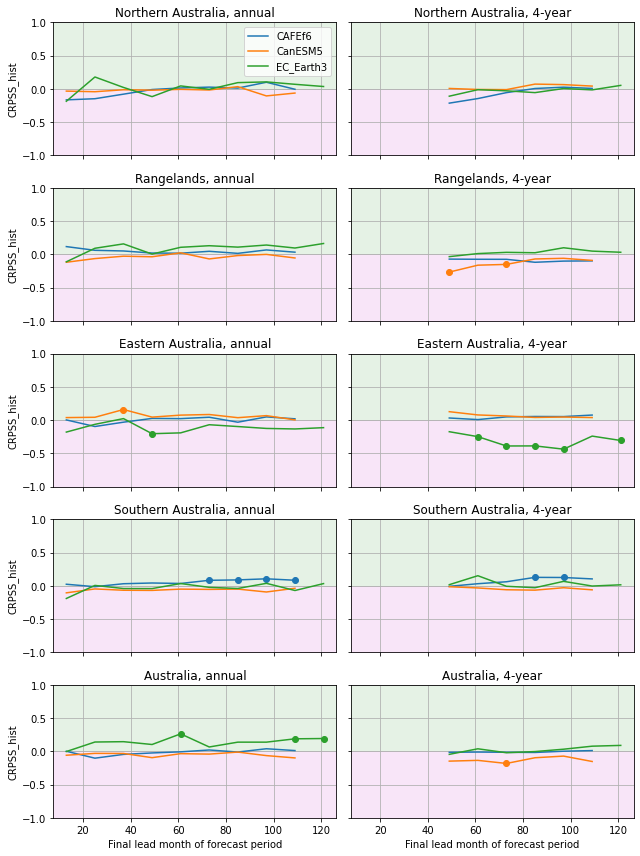

In [31]:
_ = plot_metrics(
    ["CAFEf6", "CanESM5", "EC_Earth3"],
    "AGCD",
    ["annual", "4-year"],
    "precip",
    ["CRPSS_hist"],
    "Aus_NRM",
    "3-months_under_p10",
)